In [20]:
!pip install wordcloud

In [21]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
jerky_df = pd.read_csv('https://raw.githubusercontent.com/bendgame/JerkyNotebook/master/jerky.csv')

In [3]:
jerky_df.head(3)

,descriptionID,jerkyID,manufactureDescription,brand,flavor,smoked,protein,calories,gluten free,exotic,sweet,hot,sweetSpicy,teriyaki,original,Peppered,koreanBBQ,honeyGlazed,sodium,chewy,soft,tough,moist,dry,thick,thin,grade,cost,jerkyID.1
0,1,1,Featuring only premium steak with a robust fla...,Cattlemans Cut,Original,0,10,70,0,0,0,0,0,0,1,0,0,0,570,1,0,1,0,1,1,0,NaN,NaN,1
1,2,2,"When you start with slow-cooked premium steak,...",Cattlemans Cut,peppered,0,10,70,0,0,0,1,0,0,0,1,0,0,520,1,0,1,0,1,1,0,NaN,NaN,2
2,3,3,By drenching our premium steak in a mixture of...,Cattlemans Cut,Teriyaki,0,10,70,0,0,0,0,0,1,0,0,0,0,530,1,0,1,0,0,0,0,NaN,NaN,3


In [4]:
jerky_df['norm_desc'] = [manufactureDescription.lower() for manufactureDescription in jerky_df['manufactureDescription']]

In [5]:
clean_desc = []
for w in range(len(jerky_df.norm_desc)):
    
    
    #Remove punctuations
    desc = re.sub('[^a-zA-Z]', ' ', jerky_df['norm_desc'][w])
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    # remove special characters and digits
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
    
jerky_df['clean_desc'] = clean_desc

In [6]:
word_frequency = pd.Series(' '.join(jerky_df['clean_desc']).split()).value_counts()[:20]
word_frequency.head()

jerky    70
the      67
and      58
beef     55
of       46
dtype: int64

In [7]:
stop_words = set(STOPWORDS) 

add_stopwords = ["beef", "jerky", "flavor"]
stop_words = stop_words.union(add_stopwords)

split = []
for w in range(len(jerky_df['clean_desc'])):

    split_text = jerky_df['clean_desc'][w].split()
    split_text = [word for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    split.append(split_text)

In [8]:
split

['featuring premium steak robust s rooted sweet savory seasoning brown sugar layers hardwood smoke cattleman s cut original slow cooked deliver big bold taste every bite',
 'start slow cooked premium steak brown sugar sweet savory seasoning layers hardwood smoke isn t much improve upon delicious fact thing think adding spicy fresh cracked black pepper',
 'drenching premium steak mixture soy sauce garlic brown sugar savory seasonings slow cooking hours ve created timeless smoky sweet teriyaki will leave craving',
 'flank steak s truly nothing earth thick cuts tender flank steak strips premium meat perfectly marinated garlic pepper brown sugar provide sweet rich start peppery kick make mistake though delicious ll remember',
 'real steak original recipe steaks come plate comes bag premium cuts hand picked marinated chef s soy sauce horseradish worcestershire sauce unique blend combined proprietary smoking process gives original recipe real steak perfect proportion salty spicy sweet',
 're

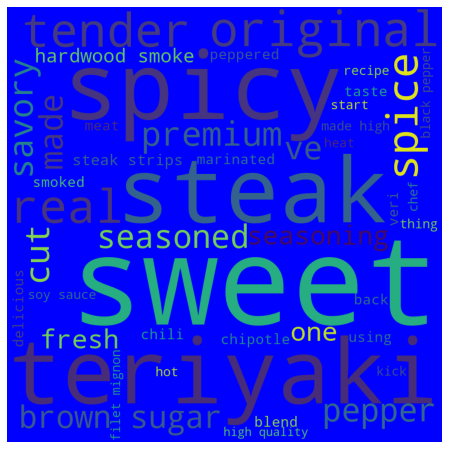

In [9]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'blue',
                          stopwords = stop_words,
                          max_words = 1000,
                          min_font_size = 20 
                          ).generate(str(split))
#print(wordcloud)
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("wordcloud.png")

In [15]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(str(split))

# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(str(split))
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('sweet', 29), ('spicy', 15), ('steak', 14), ('teriyaki', 14), ('original', 13)]
[('sweet', 1.0), ('spicy', 0.5172413793103449), ('steak', 0.4827586206896552), ('teriyaki', 0.4827586206896552), ('original', 0.4482758620689655)]


In [17]:
# create a list of candidates
brand = jerky_df.brand.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(jerky_df[(jerky_df.brand==peppered)].clean_desc.tolist()) for peppered in brand]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=brand

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [18]:
bow.head()

,accent,accent citrus,accent citrus calm,add,add brown,add brown sugar,added,added hormones,added hormones antibiotics,adding,adding spicy,adding spicy fresh,adobo,adobo flavor,adobo flavor unites,adobo jerky,adobo jerky sweet,adobo seasoning,adobo seasoning blends,adventure,adventure don,adventure don want,adventure vikings,adventure vikings crossing,aged,aged cayenne,aged cayenne finish,already,already delicious,already delicious jerky,always,always beginning,always beginning sweet,always delicious,always delicious matter,always thing,always thing ask,america,america loves,america loves peppered,...,wood will deliver,worcestershire,worcestershire sauce,worcestershire sauce unique,work,work spicy,work spicy goodness,world,world renowned,world renowned hibachi,worldly,worldly jerky,worldly jerky spirited,worlds,worlds heat,worlds heat sweet,years,years back,years back kyoto,years one,years one simple,yep,yep chef,yep chef white,yep guessed,yep guessed og,yes,yes hot,yes hot trust,yet,yet refined,yet refined filet,yet sweet,yet sweet flavor,yo,yo self,yo self may,zesty,zesty fusion,zesty fusion fresh
Cattlemans Cut,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chefs Cut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1
Field Trip,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,2,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,2,1,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Golden Island,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jacks links,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


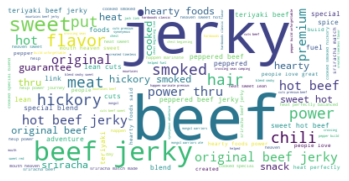

In [23]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['Jacks links'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['Jacks links'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# wordcloud = WordCloud(min_word_length =3, background_color='white') not working check versions